In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

Instructions for updating:
Use the retry module or similar alternatives.


In [12]:
# Create a mixture of two Gaussians:
tfd = tf.contrib.distributions
mix = 0.3
bimix_gauss = tfd.Mixture(
  cat=tfd.Categorical(probs=[mix, 1.-mix]),
  components=[
    tfd.Normal(loc=-1., scale=0.1),
    tfd.Normal(loc=+1., scale=0.5),
])
loc = tf.get_variable("loc", [14, 1])
x = tf.linspace(-2., 3., int(1e4))
y = bimix_gauss.prob(x)
print(loc)
print(bimix_gauss.sample())

<tf.Variable 'loc:0' shape=(14, 1) dtype=float32, numpy=
array([[ 0.32996118],
       [-0.60850734],
       [ 0.6268968 ],
       [-0.5727828 ],
       [-0.19823587],
       [-0.20342255],
       [-0.59721446],
       [-0.4224106 ],
       [-0.580154  ],
       [-0.39883745],
       [ 0.23435181],
       [ 0.02518076],
       [-0.47758391],
       [-0.3297249 ]], dtype=float32)>
tf.Tensor(0.77342147, shape=(), dtype=float32)


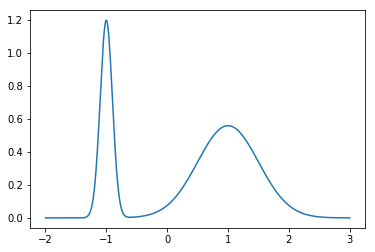

In [13]:
plt.plot(x.numpy(), y.numpy())
plt.show()

In [14]:
tfd = tf.contrib.distributions

### Create a mixture of two scalar Gaussians:

gm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(
        probs=[0.3, 0.7]),
    components_distribution=tfd.Normal(
      loc=[-1., 1],       # One for each component.
      scale=[0.1, 0.5]))  # And same here.
sm = gm.sample(20000)

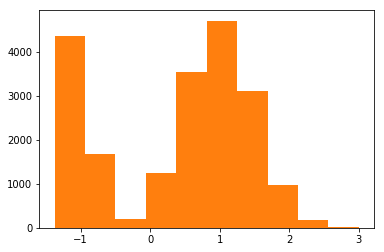

In [17]:
plt.hist(sm.numpy())
plt.show()

In [7]:
from edward.models import Categorical, Dirichlet, InverseGamma, Mixture, MultivariateNormalDiag, Normal

K = 2  # number of components
N = 500
D = 2

pi = Dirichlet(tf.ones(K))
mu = Normal(tf.zeros(D), tf.ones(D), sample_shape=K)
sigma = InverseGamma(tf.ones(D), tf.ones(D), sample_shape=K)
cat = Categorical(probs=pi, sample_shape=N)
components = [
    MultivariateNormalDiag(mu[k], sigma[k], sample_shape=N)
    for k in range(K)]
x = Mixture(cat=cat, components=components)

In [10]:
x

<ed.RandomVariable 'Mixture_1/' shape=(2,) dtype=float32>

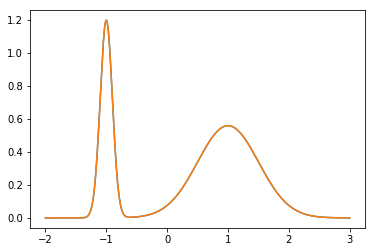

In [14]:
# Plot PDF.
import numpy as np
x = np.linspace(-2., 3., int(1e4), dtype=np.float32)
plt.plot(x, gm.prob(x).numpy())
plt.show()

In [18]:
from edward.models import Dirichlet, Categorical, InverseGamma
K = 2
D = 1
pi = Dirichlet(tf.ones(K))
sigmasq = InverseGamma(tf.ones(D), tf.ones(D), sample_shape=K)
sigmasq

<ed.RandomVariable 'InverseGamma_2/' shape=(2, 1) dtype=float32>

In [29]:
from edward.models import Dirichlet, InverseGamma, MultivariateNormalDiag, \
    Normal, ParamMixture

K = 2  # number of components

pi = Dirichlet(tf.ones(K))
mu = Normal(tf.zeros(D), tf.ones(D), sample_shape=K)
sigmasq = InverseGamma(tf.ones(D), tf.ones(D), sample_shape=K)
x = ParamMixture(pi, {'loc': mu, 'scale_diag': tf.sqrt(sigmasq)},
                 MultivariateNormalDiag,
                 sample_shape=N)
z = x.cat
z

<ed.RandomVariable 'ParamMixture_4/Categorical/' shape=(500,) dtype=int32>

In [30]:
mu

<ed.RandomVariable 'Normal_47/' shape=(2, 2) dtype=float32>

In [20]:
from edward.models import Dirichlet, InverseGamma, MultivariateNormalDiag, \
    Normal, ParamMixture
N = 500
K = 4  # number of components
D = 2
pi = Dirichlet(tf.ones(K))
mu = Normal(tf.zeros([None,2]), tf.ones([None,2]), sample_shape=K)
sigmasq = InverseGamma(tf.ones([None,2]), tf.ones([None,2]), sample_shape=K)
x = ParamMixture(pi, {'loc': mu, 'scale_diag': tf.sqrt(sigmasq)},
                 MultivariateNormalDiag,
                 sample_shape=N)

ValueError: Attempt to convert a value (None) with an unsupported type (<type 'NoneType'>) to a Tensor.

In [4]:
import tensorflow as tf
from edward.models import Categorical, Mixture, Normal
D = 1
X_ph = tf.placeholder(tf.float32, [None, D])
y_ph = tf.placeholder(tf.float32, [None])
def neural_network(X):
    """loc, scale, logits = NN(x; theta)"""
    # 2 hidden layers with 15 hidden units
    net = tf.layers.dense(X, 15, activation=tf.nn.relu)
    net = tf.layers.dense(net, 15, activation=tf.nn.relu)
    locs = tf.layers.dense(net, K, activation=None)
    scales = tf.layers.dense(net, K, activation=tf.exp)
    logits = tf.layers.dense(net, K, activation=None)
    return locs, scales, logits

K = 20  # number of mixture components

locs, scales, logits = neural_network(X_ph)
cat = Categorical(logits=logits)
components = [Normal(loc=loc, scale=scale) for loc, scale
              in zip(tf.unstack(tf.transpose(locs)),
                     tf.unstack(tf.transpose(scales)))]
y = Mixture(cat=cat, components=components, value=tf.zeros_like(y_ph))

In [14]:
locs

<tf.Tensor 'dense_7/BiasAdd:0' shape=(?, 20) dtype=float32>

In [23]:
from edward.models import Normal
D = 1
K = 5
mu = Normal(tf.zeros(D), tf.ones(D), sample_shape=K)
mu

<ed.RandomVariable 'Normal/' shape=(5, 1) dtype=float32>

In [25]:
mu[1,2]

InvalidArgumentError: slice index 2 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

In [8]:
W_1 = Normal(loc=tf.zeros([7, 10]), scale=10 * tf.ones([7, 10]), name="W_1")
W_1

<ed.RandomVariable 'W_1/' shape=(7, 10) dtype=float32>

In [13]:
c = tf.ones(1)
c

<tf.Tensor: id=24, shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [14]:
c.numpy()

array([1.], dtype=float32)